# Hvordan høres grafer ut?

Ofte tegner man grafer for å få et inntrykk av hvordan de ser ut og oppfører seg. Men man kan også høre mange av dem som lyd. Svært mye musikk (og særlig elektronisk musikk) er bygget opp på blant annet sinus-funksjonen. Der brukes den for å generere lydsignaler. Her skal vi se hvordan en sinusbølge ser ut og hvordan den høres ut. Til slutt skal vi lage melodier med sinusbølgen.

In [3]:
# Evaluer først denne

from startscript import *

%matplotlib inline

## Sinusbølge

En sinusbølge med frekvens 440 ser og høres slik ut:

In [ ]:
# Evaluer cellen - Sinusbølge
frekvens = 440                                     # Frekvensen avgjør hvilken tone vi hører.
varighet = 2                                       # Lydens varighet i sekunder
t = linspace(0.0, varighet, int(varighet * rate))  # Initialiser et array for tidsaksen i signalet
sinusbølge = sin(frekvens * 2. * pi * t)           # Lag et array som inneholder alle verdiene for sinusbølgen.

spill_av(sinusbølge)



# -----------------------------------------------------------------------------------------
# Under er kode for å plotte grafen. Den er ikke relatert til det å produsere lyden
# og er kun for å vise hvordan lydbølgen ser ut. Generelt for hele dokumentet er det
# ikke nødvendig å sette seg inn i hvordan plottingen fungerer:)
x = arange(0, 900)  # Viser de 900 første målepunktene i signalet/lydbølgen (0 <= x <= 500)
figure().set_figwidth(15)
title("Sinusbølge 440-hertz")
xlabel("samplenummer (tid)")
ylabel("amplitude (lydstyrke)")
axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
plot(x,sinusbølge[0:900])
show()

Hvorfor akkurat 440 Hertz? Denne tonen kalles en _enstrøken a_, den kan også skrives a'. Enstrøken a er kjent som _kammertonen_, og det er denne orkestre og musikere gjerne stemmer instrumentene etter før de skal spille.

## Prøv selv

Forsøk å endre på frekvens og varighet til sinusbølgen. Se og hør hvordan det påvirker signalet. Prøv med
- to-tre forskjellige hørbare frekvensverdier (i rekkevidden 100-10000Hz). Bruk gjerne svært forskjellige frekvensverdier.
- to-tre ulike varigheter.

<div class="alert alert-block alert-info">
<b>Tips:</b> Selv om øret er i stand til å oppfatte frekvenser i rekkevidden 20-20000Hz er det ikke sikkert at høyttaleren klarer å produsere lyden. En vanlig datamaskinhøyttaler kan kanskje produsere frekvenser ned mot 100Hz, men ikke frekvenser lavere enn dette. Generelt sett krever dype toner større høyttalere.
</div>

In [ ]:
# Sinusbølge - Skriv inn verdier og evaluer cellen.
frekvens = ...  # Skriv inn hørbare frekvenser her (eks: 100 - 10000)
varighet = ...  # Velg varighet (i sekunder).

t = linspace(0.0, varighet, int(varighet * rate))  # Tidsaksen
sinusbølge = sin(frekvens * 2. * pi * t)           # Sinusbølgen.


spill_av(sinusbølge)



# -----------------------------------------------------------------------------------------
# Kode for å plotte grafen
x = arange(0, 700)  # Viser de 500 første målepunktene i signalet/lydbølgen (0 <= x <= 500)
figure().set_figwidth(15)
title(f"Sinusbølge {frekvens}-hertz")
xlabel("samplenummer (tid)")
ylabel("amplitude (lydstyrke)")
axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
plot(x,sinusbølge[0:700])
show()

For å gjøre det enklere for oss selv definerer vi en funksjon `sinus_generator` som gir oss sinusbølger med angitt frekvens, varighet og amplitude.

In [9]:
# Evaluer cellen

def sinus_generator(frekvens=440, varighet=1.0, amplitude=1.0):
    t = linspace(0., varighet, int(varighet * rate))
    sinusbølge = sin(frekvens * pi * 2 * t) * amplitude
    return sinusbølge

In [10]:
# Evaluer slik at sinusbølgen spilles av

sinusbølge = sinus_generator(440, 2.5, 1)   # Frekvens: 440, varighet: 2.5 sek, amplitude: 1

spill_av(sinusbølge)

Se om generatoren gir oss de forventede lydene og varighetene.

- Test med to-tre ulike verdier for frekvens (i rekkevidden ca. 100-10000)
- og to-tre ulike verdier for varighet

In [ ]:
# Test med egne frekvenser og varigheter. Lar amplitude være 1 for øyeblikket.

sinusbølge = sinus_generator(..., ..., 1)

spill_av(sinusbølge)

# Melodier

<div class="alert alert-block alert-info">
<b>Anbefalte forkunnskaper:</b> Kjennskap til lister i Python.
</div>

Vi har nå en funksjon `sinus_generator` som lager toner for oss. La oss lage en funksjon som kombinerer enkelttoner til en melodi.

In [12]:
# Evaluer denne cellen slik at vi kan bruke den andre steder.

def lag_melodi(liste_med_signaler):
    return concatenate(liste_med_signaler)

`lag_melodi` tar en liste med signaler, for eksempel en liste med signaler vi får fra `sinus_generator`. Hvis du er usikker på hvordan lister fungerer trenger du bare vite at en liste er en samling med elementer, og at den kan inneholde for eksempel tall, strenger, andre lister eller lydsignalene våre. Man bruker klammeparentes for å lage lister i Python, og må ha et komma mellom hvert element i listen: `[element1, element2, element3]`.

Her er først en veldig kort melodi:

In [14]:
# Test at funksjonen fungerer. Spilles tre toner etter hverandre?

liste_med_toner = [sinus_generator(frekvens=261, varighet=1, amplitude=1),
                   sinus_generator(frekvens=293, varighet=1, amplitude=1),
                   sinus_generator(frekvens=329, varighet=1, amplitude=1)]

melodi = lag_melodi(liste_med_toner)   # Setter enkelttonene sammen til ett signal
spill_av(melodi)

Vi kan også skrive listen direkte inn i funksjonskallet uten å lagre det i en variabel. Denne gangen med tre nye toner.

In [15]:
# Evaluer cellen.

# listen er direkte i 'lag_melodi'-kallet
melodi = lag_melodi([sinus_generator(frekvens=329, varighet=1, amplitude=1),
                   sinus_generator(frekvens=349, varighet=1, amplitude=1),
                   sinus_generator(frekvens=391, varighet=1, amplitude=1)])
spill_av(melodi)

La oss prøve med litt flere toner etter hverandre. Merk at varigheten her er `0.5`.

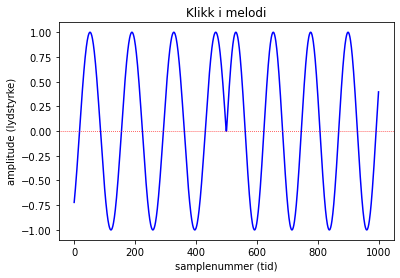

In [16]:
v = 0.5   # varighet

# Merk at vi ikke spesifiserer amplitude her. Da brukes verdien 1.0. Mer om det senere.
melodi = lag_melodi([
    sinus_generator(261, v),   # Tonen c
    sinus_generator(293, v),   # d
    sinus_generator(329, v),   # e
    sinus_generator(349, v),   # f
    sinus_generator(391, v),   # g
    sinus_generator(349, v),   # f
    sinus_generator(329, v),   # e
    sinus_generator(293, v),   # d
    sinus_generator(261, 1),   # c
])

spill_av(melodi)



# ----------------------------------------
# Kode for å plotte graf:
start = int(rate * varighet) - 500
slutt = start + 1000
x = arange(0, slutt - start)
plot(x, melodi[start:slutt], color='blue')
title("Klikk i melodi")
xlabel("samplenummer (tid)")
ylabel("amplitude (lydstyrke)")
axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
show()

Du hører kanskje et klikk hver gang tonen skifter. Det er fordi høyttaleren brått må snu seg slik som vist i grafen. Det lager en klikkelyd. Det fins triks for å hindre at det skjer, men det skal vi ikke se på nå. Denne "klikk"-effekten blir også brukt for å lage perkussive, trommeaktige lyder i elektronisk musikk.

## Prøv selv

Forsøk selv å lage to-tre melodier bestående av 5-10 toner hver.

- 1. Lag en melodi hvor alle tonene har lik varighet.
- 2. Lag en melodi hvor du bruker ulike varigheter. Har det noe å si dersom varighetene går opp i hverandre, for eksempel hvis du bruker varigheter som `0.25`, `0.5`, `0.75`, `1.0`? Hva hvis du bruker helt vilkårlige varigheter?

Her er noen forslag til frekvenser du kan bruke:

- (tostrøken) c: 523
- b: 493 (tonen kalles også 'h' på norsk)
- a: 440
- g: 391
- f: 349
- e: 329
- d: 293
- c: 261
- (lille) g: 195

En komplett oversikt over alle pianoets tangenter og frekvensene deres finner du her: https://no.wikipedia.org/wiki/Tangentfrekvenser_(piano)

In [ ]:
# Lag melodi 1

melodi = lag_melodi([
    # sinus_generator(..., ...),
    # sinus_generator(..., ...),
    # ...
])

spill_av(melodi)

In [ ]:
# Lag melodi 2

melodi = lag_melodi([
    # sinus_generator(..., ...),
    # sinus_generator(..., ...),
    # ...
])

spill_av(melodi)

In [ ]:
# Fritt frem!

melodi = lag_melodi([
    # sinus_generator(..., ...),
    # sinus_generator(..., ...),
    # ...
])

spill_av(melodi)